## 1. The MNIST dataset

In [75]:
## import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sns
import pandas as pd
import time

In [76]:
## Load the training set
train_data = np.load("MNIST/train_data.npy")
train_labels = np.load("MNIST/train_labels.npy")

## Load the testing set
test_data = np.load("MNIST/test_data.npy")
test_labels = np.load("MNIST/test_labels.npy")

In [77]:
## Print out their dimensions
print("demension of training data:",np.shape(train_data))
print("length of training labels:",len(train_labels))
print("demension of testing data:",np.shape(test_data))
print("length of testing data:",len(test_labels))

demension of training data: (7500, 784)
length of training labels: 7500
demension of testing data: (1000, 784)
length of testing data: 1000


In [78]:
## show the count of each label for training set
train_label_values,label_value_counts = np.unique(train_labels,return_counts=True)
df_train_labels_counts = pd.DataFrame({"counts" : label_value_counts},index = train_label_values)
df_train_labels_counts.index.name = "train_label"
df_train_labels_counts

,counts
train_label,
0,750
1,750
2,750
3,750
4,750
5,750
6,750
7,750
8,750


In [79]:
## show the count of each label for testing set
test_label_values,label_value_counts = np.unique(test_labels,return_counts=True)
df_test_labels_counts = pd.DataFrame({"counts" : label_value_counts},
                                     index = test_label_values)
df_test_labels_counts.index.name = "test_label"
df_test_labels_counts

,counts
test_label,
0,100
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100


## 2. Visualizing the data

In [80]:
## Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def imshow_by_index_dataset(index,dataset):  # dataset is "train_data" or "test_data"
    if dataset== "train_data":
        plt.imshow(train_data[index].reshape((28,28)),cmap=plt.cm.gray)
        plt.axis("off")
        plt.title(f"train label: {train_labels[index]}")
        plt.show()
        
    if dataset== "test_data":
        plt.imshow(test_data[index].reshape((28,28)),cmap=plt.cm.gray)
        plt.axis("off")
        plt.title(f"test label: {test_labels[index]}")
        plt.show()

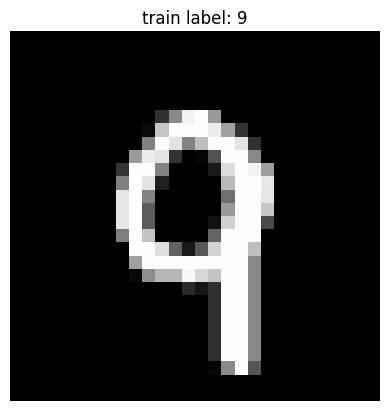

In [81]:
## View the first data point in the training set
imshow_by_index_dataset(0,"train_data")

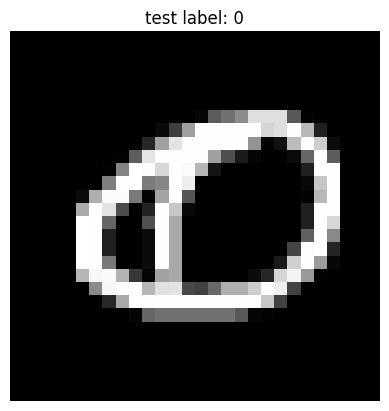

In [82]:
## Now view the first data point in the test set
imshow_by_index_dataset(0,"test_data")

## 3. Squared Euclidean distance

In [83]:
## define a function to computes squared Euclidean distance between two vectors.
def Euc_distance(vec_1, vec_2):
    return np.sqrt(np.sum(np.square(vec_1 - vec_2)))

In [84]:
train_labels[:10]

array([9, 2, 8, 3, 7, 1, 6, 7, 9, 2], dtype=uint8)

In [85]:
## Compute distance between 2 different labels  in our training set.
Euc_distance(train_data[0],train_data[1])

np.float32(3270.7014)

In [86]:
## Compute distance between 2 different labels in our training set.
Euc_distance(train_data[0],train_data[4])

np.float32(2478.3728)

In [87]:
## Compute distance between 2 same labels in our training set.
Euc_distance(train_data[4],train_data[7])

np.float32(2285.4766)

## 4. Computing nearest neighbors

In [88]:
## Takes a vector x and returns the index of its nearest neighbor in train_data
def Nearest_neighbor_index(vec):
    nearest_dis = Euc_distance(vec,train_data[0])
    nearest_index = 0
    for i in range(1,len(train_data)):
        if Euc_distance(vec,train_data[i]) < nearest_dis:
            nearest_dis = Euc_distance(vec,train_data[i])
            nearest_index = i
    return nearest_index      # return the nearest point's label and its corresponding index

In [89]:
train_labels[:20]

array([9, 2, 8, 3, 7, 1, 6, 7, 9, 2, 0, 7, 7, 2, 3, 9, 6, 9, 5, 6],
      dtype=uint8)

In [90]:
test_labels[:20]

array([0, 2, 6, 5, 9, 6, 0, 7, 1, 1, 4, 6, 7, 7, 5, 7, 7, 7, 0, 0],
      dtype=uint8)

success case:

the nearest label: 2


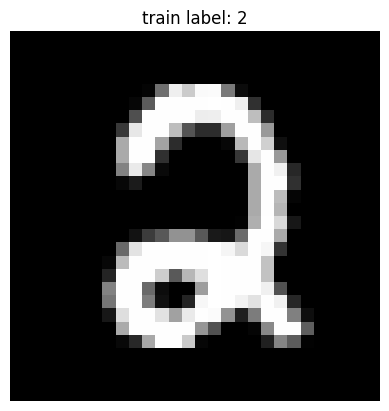

the true test label: 2


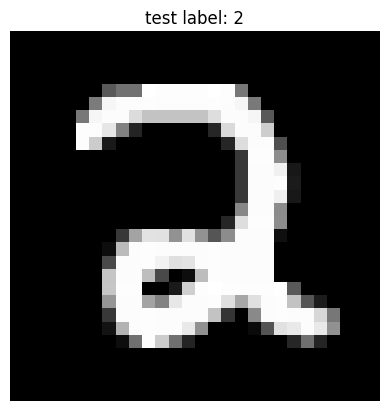

In [91]:
## A success case:
print("success case:")
print()
nearest_index = Nearest_neighbor_index(test_data[1])
print("the nearest label:", train_labels[nearest_index])
imshow_by_index_dataset(nearest_index,"train_data")
print("the true test label:", test_labels[1])
imshow_by_index_dataset(1,"test_data")

failure case:

the nearest label: 2


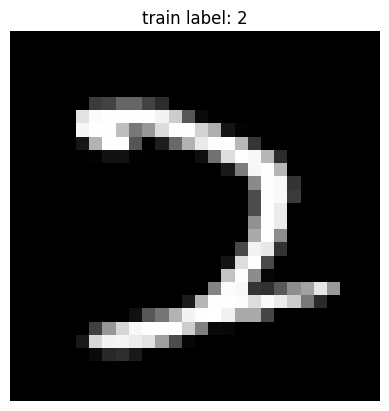

the true test label: 3


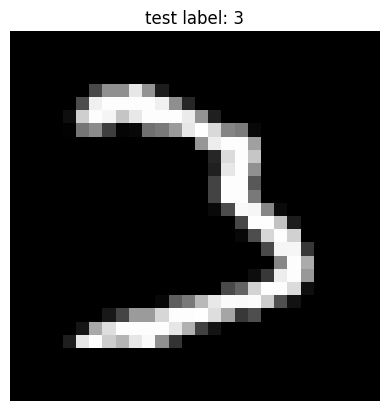

In [92]:
## A failure case:
print("failure case:")
print()
nearest_index = Nearest_neighbor_index(test_data[39])
print("the nearest label:", train_labels[nearest_index])
imshow_by_index_dataset(nearest_index,"train_data")
print("the true test label:", test_labels[39])
imshow_by_index_dataset(39,"test_data")

## 5. Processing the full test set 

In [93]:
## Predict all test data points and record the time
start_time = time.time()
ED_test_prediction_labels = []
for i in range(len(test_labels)):
    nearest_index = Nearest_neighbor_index(test_data[i])
    ED_test_prediction_labels.append(train_labels[nearest_index])
end_time = time.time()

predict_time = end_time - start_time
print("prediction time using Euclidean distance:", predict_time)

prediction time using Euclidean distance: 21.55227780342102


In [94]:
## Compute the error
error_count = np.sum(ED_test_prediction_labels!=test_labels)
error_index = np.where(ED_test_prediction_labels!=test_labels)
error_rate = error_count/len(test_labels)
print("error indexes: ", error_index)
print("error rate is : ", error_rate)

error indexes:  (array([ 39,  47,  88, 124, 132, 138, 152, 193, 233, 252, 256, 260, 301,
       338, 349, 357, 358, 362, 377, 398, 409, 410, 449, 453, 460, 536,
       557, 575, 618, 637, 639, 671, 707, 717, 747, 762, 779, 802, 828,
       841, 912, 918, 926, 937, 938, 954]),)
error rate is :  0.046


## 6. Faster nearest neighbor methods : BallTree and k-d tree

In [95]:
from sklearn.neighbors import BallTree
start_time = time.time()
BallTree_model = BallTree(train_data)
BT_test_prediction_labels_index = np.squeeze(BallTree_model.query(test_data,k=1,return_distance=False))
BT_test_prediction_labels_list = [train_labels[i] for i in BT_test_prediction_labels_index]
BT_test_prediction_labels = np.array(BT_test_prediction_labels_list)
end_time = time.time()

BallTree_prediction_time = end_time - start_time
print("prediction time using BallTree:",BallTree_prediction_time)
no_equal_labels_count = np.sum(BT_test_prediction_labels!=ED_test_prediction_labels)
print("the count of label not equal to EU method:", no_equal_labels_count)

prediction time using BallTree: 5.4879679679870605
the count of label not equal to EU method: 0


In [96]:
from sklearn.neighbors import KDTree
start_time = time.time()
KDTree_model = BallTree(train_data)
KDT_test_prediction_labels_index = np.squeeze(KDTree_model.query(test_data,k=1,return_distance=False))
KDT_test_prediction_labels_list = [train_labels[i] for i in KDT_test_prediction_labels_index]
KDT_test_prediction_labels = np.array(KDT_test_prediction_labels_list)
end_time = time.time()

KDT_prediction_time = end_time - start_time
print("prediction time using BallTree:",KDT_prediction_time)
no_equal_labels_count = np.sum(KDT_test_prediction_labels!=ED_test_prediction_labels)
print("the count of label not equal to EU method:", no_equal_labels_count)

prediction time using BallTree: 5.368067026138306
the count of label not equal to EU method: 0
